In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('mammographic_masses.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 830 entries, 0 to 829
Data columns (total 6 columns):
BI-RADS     830 non-null int64
Age         830 non-null int64
Shape       830 non-null int64
Margin      830 non-null int64
Density     830 non-null int64
Severity    830 non-null int64
dtypes: int64(6)
memory usage: 39.0 KB


In [4]:
data.describe()

,BI-RADS,Age,Shape,Margin,Density,Severity
count,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000
mean,4.393976,55.781928,2.781928,2.813253,2.915663,0.485542
std,1.888371,14.671782,1.242361,1.567175,0.350936,0.500092
min,0.000000,18.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,46.000000,2.000000,1.000000,3.000000,0.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000,0.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,55.000000,96.000000,4.000000,5.000000,4.000000,1.000000


In [5]:
data.head(10)

,BI-RADS,Age,Shape,Margin,Density,Severity
0,5,67,3,5,3,1
1,5,58,4,5,3,1
2,4,28,1,1,3,0
3,5,57,1,5,3,1
4,5,76,1,4,3,1
5,3,42,2,1,3,1
6,4,36,3,1,2,0
7,4,60,2,1,2,0
8,4,54,1,1,3,0
9,3,52,3,4,3,0


# Outlier
As per the research, BI-RADS (Breast Imaging Reportting and Data Systems) is categorized numerical from 0 to 6. 
But max value for BI-RADS is 55, which might be a typo acting as an outlier.

In [6]:
data[data['BI-RADS'] == 55]

,BI-RADS,Age,Shape,Margin,Density,Severity
257,55,46,4,3,3,1


In [7]:
data = data.drop(257, axis=0)

In [8]:
data.describe()

,BI-RADS,Age,Shape,Margin,Density,Severity
count,829.000000,829.000000,829.000000,829.000000,829.000000,829.000000
mean,4.332931,55.793727,2.780458,2.813028,2.915561,0.484922
std,0.688160,14.676698,1.242389,1.568107,0.351136,0.500074
min,0.000000,18.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,46.000000,2.000000,1.000000,3.000000,0.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000,0.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,6.000000,96.000000,4.000000,5.000000,4.000000,1.000000


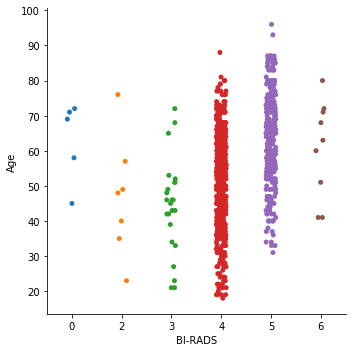

In [9]:
sns.catplot(x='BI-RADS',y='Age', data=data)

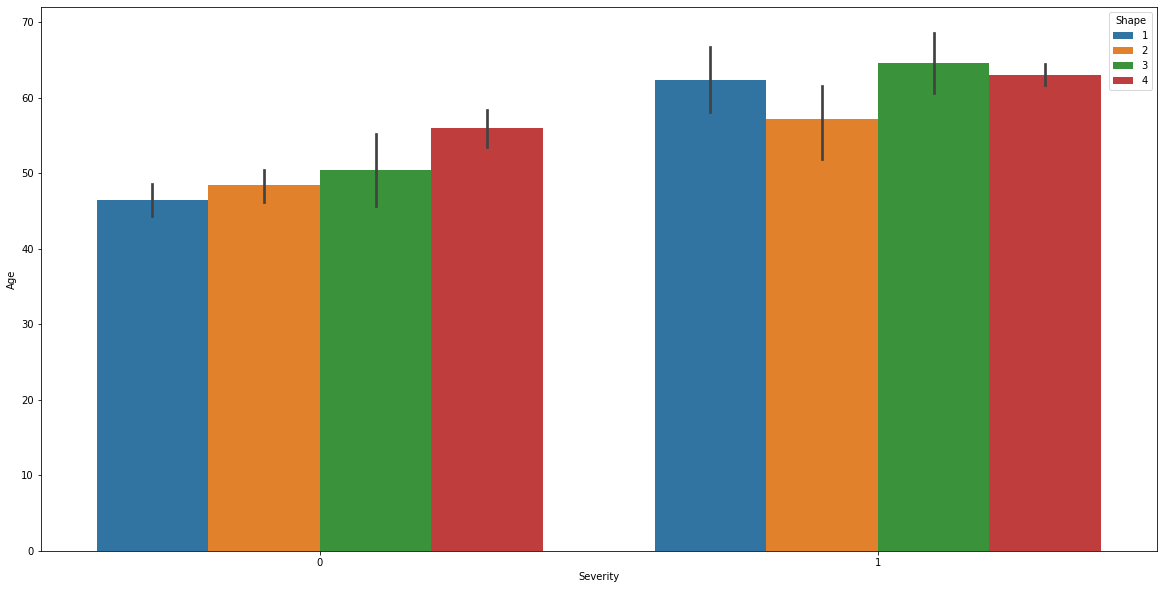

In [10]:
plt.figure(figsize=(20,10))
sns.barplot(x='Severity',y='Age', data=data, hue='Shape')

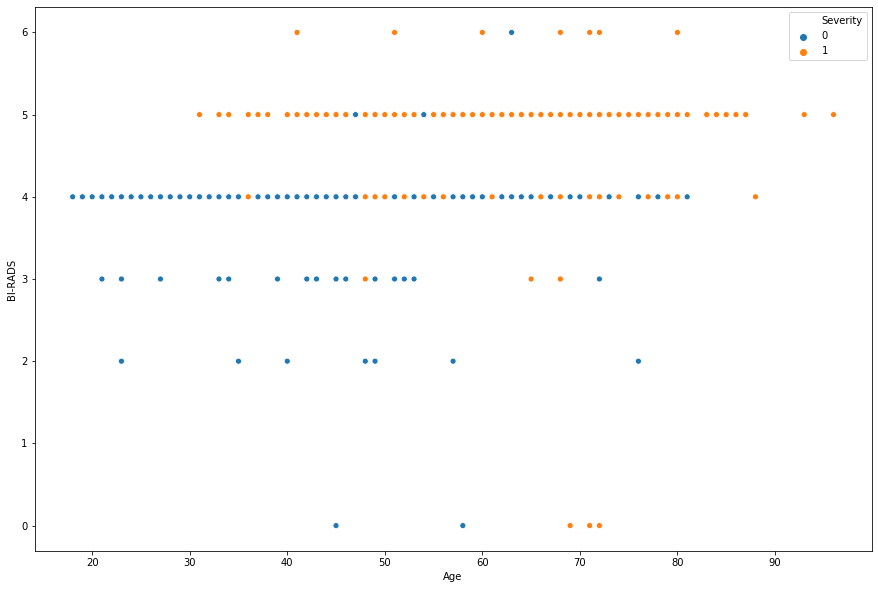

In [11]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='Age', y='BI-RADS', data=data, hue='Severity')

In [12]:
X = data[['BI-RADS','Age','Shape','Margin','Density']]

In [13]:
y = data['Severity']

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=59)

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

lr = LogisticRegression()
lr.fit(X_train,y_train)

y_predict = lr.predict(X_test)
print("Accuracy:", lr.score(X_test, y_test))

print(confusion_matrix(y_test, y_predict))

Accuracy: 0.8557692307692307
[[88 15]
 [15 90]]


D:\Ananconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# Ensemble Method Analysis

In [17]:
from sklearn.ensemble import AdaBoostClassifier

e1 = AdaBoostClassifier()
e1.fit(X_train, y_train)

y_predict1 = e1.predict(X_test)
print("Accuracy:", e1.score(X_test,y_test))

print(confusion_matrix(y_test,y_predict1))

Accuracy: 0.8605769230769231
[[94  9]
 [20 85]]


In [18]:
from sklearn.ensemble import RandomForestClassifier

e2 = RandomForestClassifier()
e2.fit(X_train,y_train)

y_predict2 = e2.predict(X_test)
print("Accuracy:", e2.score(X_test,y_test))

print(confusion_matrix(y_test,y_predict2))

Accuracy: 0.7788461538461539
[[85 18]
 [28 77]]


D:\Ananconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
